# Scatterplots and Correlation
> Quantitative vs. Quantitative

#### 使用的工具
> - [plt.scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [sns.regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fuel_df = pd.read_csv('./fuel-econ.csv')
fuel_df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Engine displacement (liter) vs. Overall fuel mileage (miles per gallon)

#### plt.scatter()

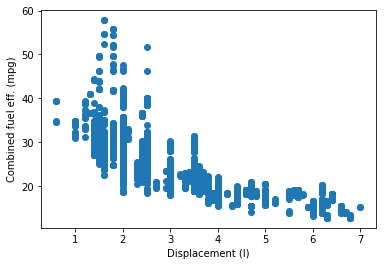

In [2]:
plt.scatter(data=fuel_df, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

#### sns.regplot()
> By default, the regression function is linear, and includes a shaded confidence region for the regression estimate.

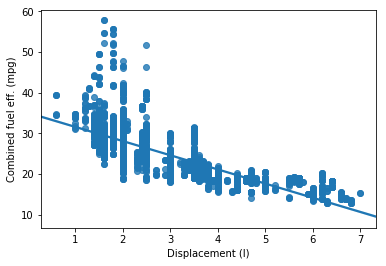

In [3]:
sns.regplot(data=fuel_df, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

#### Note:
There might be $log(y) ∝ x$ relationship (that is, linear increases in the value of x are associated with linear increases in the log of y) in the data.  

If we want to plot the regression line on the observed relationship in the data, we need to transform the data.
``` python
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['num_var1'], df['num_var2'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)
```

# Overplotting
> Where a plot is create with too many overlapping points or our numeric variables are discrete-valued.

Can be solved with:
1. Sampling - Randomly choose less points.
2. Transparency
3. Jitter - Add a small amount of random noise to the position of each point.

### Manufacturing year vs. Overall fuel mileage (miles per gallon)

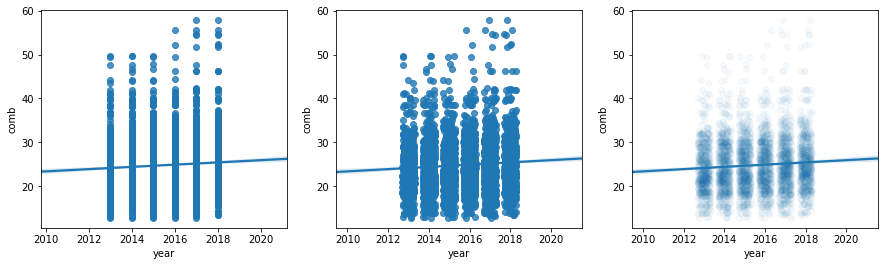

In [4]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.regplot(data=fuel_df, x='year', y='comb');
# add jitter
plt.subplot(1, 3, 2)
sns.regplot(data=fuel_df, x='year', y='comb', x_jitter=0.3);
# add transparency
plt.subplot(1, 3, 3)
sns.regplot(data=fuel_df, x='year', y='comb',
            x_jitter=0.3,
            scatter_kws = {'alpha' : 1/30});

> The right most plot is more distinguishable. Note the regression line won't affect by jitter.